In [1]:
import glob
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use("seaborn-white")
colors=sns.color_palette('deep')

In [2]:
def getfiles(exp_name):
    dis_f=glob.glob(f"./logs/tbd/*{exp_name}_#*")[0]
    cent_f=glob.glob(f"./logs/tbd/*{exp_name}_c*")[0]
    return {'dis':dis_f,'cent':cent_f}

In [3]:
def plot_experiment_convergence(exp_name,yliml=None,ylimh=None):
    files=getfiles(exp_name)

    df1=pd.read_csv(files['dis'])
    df2=pd.read_csv(files['cent'])

    fig=plt.figure(figsize=(7,5))
    ax=fig.add_subplot(111)

    ax.plot(df1["Step"],df1["Value"].rolling(10).mean(),linewidth=3,
            c=colors[0],label="D-GLIDE")
    ax.fill_between(df1["Step"],df1["Value"].rolling(10).mean()-df1["Value"].rolling(10).std(),
                   df1["Value"].rolling(10).mean()+df1["Value"].rolling(10).std(),alpha=0.2,color=colors[0])
    
    ax.plot(df2["Step"],df2["Value"].rolling(10).mean(),linewidth=3,linestyle='--',
            c=colors[1],label="C-GLIDE")
    ax.fill_between(df2["Step"],df2["Value"].rolling(10).mean()-df2["Value"].rolling(10).std(),
                   df2["Value"].rolling(10).mean()+df2["Value"].rolling(10).std(),alpha=0.2,color=colors[1])


    ax.set_xlim(0,25e6)
    ax.set_ylim(yliml,ylimh)
    scale_x = 1e6
    ticks_x = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
    ax.xaxis.set_major_formatter(ticks_x)

    plt.xlabel("Time slots (M)",fontsize=22)
    plt.ylabel("Reward",fontsize=22)

    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    ax.legend(loc="lower right",fontsize=22)
    ax.grid()
    
    plt.tight_layout()
    plt.close()
    return fig

In [4]:
plot_experiment_convergence('mine1',-80,0).savefig("./logs/converge/mine1.pdf")
plot_experiment_convergence('mine6').savefig("./logs/converge/mine6.pdf")

plot_experiment_convergence('target1',-70,0).savefig("./logs/converge/target1.pdf")
plot_experiment_convergence('target6').savefig("./logs/converge/target6.pdf")

plot_experiment_convergence('uav1').savefig("./logs/converge/uav1.pdf")
plot_experiment_convergence('uav6',-80,0).savefig("./logs/converge/uav6.pdf")

In [5]:
#NICE

In [2]:
with open('./logs/dump/res.pkl', 'rb') as handle:
    res = pickle.load(handle)

In [3]:
dis=\
[res['uav1_dis']['reward'],
 res['uav2_dis']['reward'],
 res['uav3_dis']['reward'],
 res['default_exp_dis']['reward'],
 res['uav5_dis']['reward']]

cent=\
[res['uav1_cent']['reward'],
 res['uav2_cent']['reward'],
 res['uav3_cent']['reward'],
 res['default_exp_cent']['reward'],
 res['uav5_cent']['reward']]

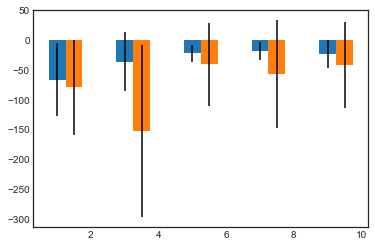

In [17]:
w=0.5
pos=np.array([1,3,5,7,9])

plt.bar(x=pos,height=[np.mean(h) for h in dis],yerr=[np.std(h) for h in dis],width=w)
plt.bar(x=pos+0.5,height=[np.mean(h) for h in cent],yerr=[np.std(h) for h in cent],width=w)

# plt.boxplot(positions=pos,x=dis,widths=0.5)
# plt.boxplot(positions=pos+0.5,x=cent,widths=0.5)
plt.show()